This dataset contains tweets that either mention a disaster (target = 1) or do not mention a disaster (target = 0). Our goal is to use this dataset to develop a model that predicts if a tweet is related to a disaster or not.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import tensorflow as tf
from keras import datasets, layers, models, optimizers, losses
from sklearn.metrics import accuracy_score

EDA:

I love fruits
Forest fire near La Ronge Sask. Canada


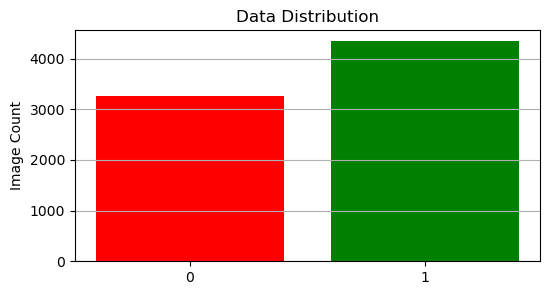

In [2]:
train = pd.read_csv(r'C:/nlp-getting-started/train.csv')
test = pd.read_csv(r'C:/nlp-getting-started/test.csv')


print(train[train["target"] == 0]["text"].values[1]) #Example of a tweet not about a disaster
print(train[train["target"] == 1]["text"].values[1]) #Example of a tweet about a disaster

labels = train["target"].unique()
counts = train["target"].value_counts()

plt.figure(figsize=(6, 3))
plt.bar(labels, counts, color=["green", "red"])
plt.ylabel("Image Count")
plt.title("Data Distribution")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()


Data preprocessing:

In [3]:
count_vectorizer = feature_extraction.text.CountVectorizer()

train_vectors = count_vectorizer.fit_transform(train["text"])

test_vectors = count_vectorizer.transform(test["text"])

Build and train model:

In [4]:
clf = linear_model.RidgeClassifier()

scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv=3, scoring="f1")
print(scores)

clf.fit(train_vectors, train["target"])


[0.59453669 0.5642787  0.64082434]


RidgeClassifier()

Prediction and Submission:

In [5]:
pred = clf.predict(test_vectors)

submission = pd.DataFrame({'id': test['id'], 'target': pred})
submission.to_csv('submission.csv', index=False)